In [ ]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [ ]:
pop_restaurants = Table.read_table('/content/restrauants_inspections_scores.csv')
pop_restaurants

Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652",2803436,Routine Inspection
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652",2803436,Routine Inspection
6M Grocery,78652,05-02-2016,88,"805 W FM 1626 RD AUSTIN, TX 78652",2803436,Routine Inspection
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652",2803436,Routine Inspection
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652",2803436,Routine Inspection
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652",2803436,Routine Inspection
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660",10874330,Routine Inspection
7 Eleven #36575,78660,03-05-2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660",10874330,Routine Inspection
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660",10874330,Routine Inspection
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660",10874330,Routine Inspection


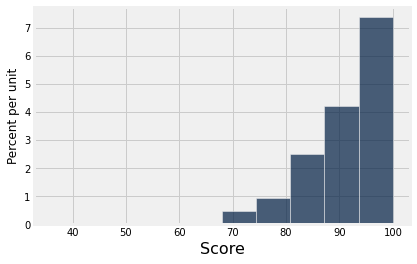

In [ ]:
pop_restaurants.hist('Score')

In [ ]:
pop_mean = np.mean(pop_restaurants.column('Score'))
pop_mean

91.40706693478886

In [ ]:
restaurant_sample =  pop_restaurants.sample(100,with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
Quinta Caporales Meat Market- Deli,78745,10/15/2014,77,"730 W STASSNEY LN Unit 105 AUSTIN, TX 78745 (30.209029 ...",10243063,Routine Inspection
Tortilleria Krystal,78753,10-09-2015,86,"1033 E HOWARD LN Bunit C AUSTIN, TX 78753 (30.409133, ...",11170853,Routine Inspection
La Quinta Inn #0186,78744,02/14/2014,94,"7625 E BEN WHITE BLVD EB AUSTIN, TX 78744 (30.217923, ...",10082646,Routine Inspection
Growing Imagination Day Care,78704,09/22/2016,100,"1711 FORT VIEW RD AUSTIN, TX 78704 (30.229636, -97.784811)",2801108,Routine Inspection
Winebelly,78704,06-09-2016,94,"519 W OLTORF ST AUSTIN, TX 78704 (30.241737, -97.758782)",10955852,Routine Inspection
Conoco,78741,04/13/2015,97,"6214 E RIVERSIDE DR AUSTIN, TX 78741 (30.225194, -97.7 ...",2803603,Routine Inspection
Central Donut,78729,04/21/2016,94,"8516 ANDERSON MILL RD Unit 105 AUSTIN, TX 78729 (30.45 ...",10701704,Routine Inspection
Child Development Center,78756,05-04-2016,100,"3901 SHOAL CREEK BLVD AUSTIN, TX 78756 (30.307993, -97 ...",10219601,Routine Inspection
Epoch Coffee,78751,04-08-2015,96,"221 W NORTH LOOP BLVD AUSTIN, TX 78751 (30.318756, -97 ...",2802985,Routine Inspection
7-Eleven Convenience Store #36273A,78731,10/23/2014,94,"3550 FAR WEST BLVD AUSTIN, TX 78731 (30.353551, -97.75 ...",11087894,Routine Inspection


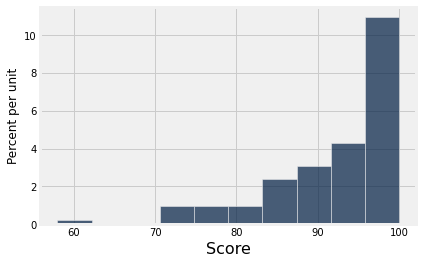

In [ ]:
restaurant_sample.hist('Score')

In [ ]:
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_mean

92.12

Question 1.1

In [ ]:
def one_resampled_mean(data):
  '''
  Returns mean of Restaurants score for a sample
  '''
  resampled_data = data.sample()
  return np.mean(resampled_data.column('Score'))



In [ ]:
this_mean = one_resampled_mean(pop_restaurants)
this_mean

91.41231994090369

In [ ]:
def bootstrap_scores():
  resampled_means = np.array([])
  for i in range(5000):
    resampled_mean = one_resampled_mean(restaurant_sample)
    resampled_means = np.append(resampled_mean,resampled_means)
  
  return resampled_means


bootstrap_means = bootstrap_scores()
bootstrap_means

92.11875

Question 1.2

In [ ]:
def bootstrap_scores():
  resampled_means = np.array([])
  for i in range(5000):
    resampled_mean = one_resampled_mean(restaurant_sample)
    resampled_means = np.append(resampled_mean,resampled_means)
  
  return resampled_means


bootstrap_means = bootstrap_scores()
bootstrap_means

array([90.96, 91.21, 92.33, ..., 91.94, 91.89, 91.15])

In [ ]:
np.std(bootstrap_means)

0.8148351106205475

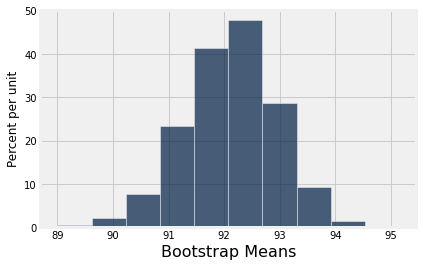

In [ ]:
(Table().with_column('Bootstrap Means',bootstrap_means)).hist()

Question 1.3

In [ ]:
lower_bound = percentile(2.5,bootstrap_means)
higher_bound = percentile(97.5,bootstrap_means)

print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound,",",higher_bound,")")


95% confidence interval for the average restaurant score, computed by bootstrapping:
( 90.43 , 93.63 )


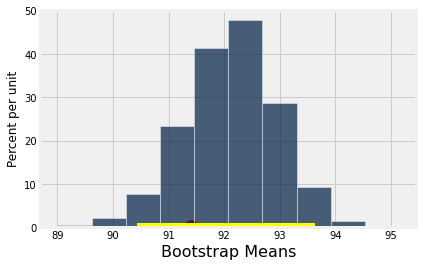

In [ ]:
(Table().with_column('Bootstrap Means',bootstrap_means)).hist()

plots.plot(make_array(lower_bound,higher_bound),make_array(0,0),color='yellow',lw=8,zorder=1)
plots.scatter(pop_mean,0,s=200,c='red')
#plots.scatter(np.mean(bootstrap_means),0,s=200,c='blue')

Question 1.4

---

In question 1.2, all the sampled means are calculated and plotted in a histogram to give us an idea about the variablilty of sample means of the different samples drawn from a population, but in question 1.3 we are doing it using only a single sample. We are doing resampling 5000 times as the law of large numbers state that when an experiment is repeated large number of times the estimate will be close to the real value. And when the sample is large enough the real value will be close to population parameter.

Question 1.5

---

Yes, the distribution of the means looks much closer to a normal distribution. The distribution seems more and more into an emperical distribution the more we simulate many many times. 

Question 1.6

In [ ]:
sample_size = restaurant_sample.num_rows 

sample_std = np.std(pop_restaurants.column('Score'))/np.sqrt(sample_size)

left = sample_mean - 2 * sample_std
right = sample_mean + 2 * sample_std

print('confidence interval is around\n ( '+ str(left) + ' , '+ str(right)+ ' )')


confidence interval is around
 ( 90.58618327076104 , 93.65381672923897 )


Question 2.1

In [ ]:
coin_proportions = make_array(0.5,0.5)

def one_statistic_prop_heads(n):
  simulated_proportions = sample_proportions(n,coin_proportions)
  prop_heads = simulated_proportions[0]
  return prop_heads

In [ ]:
one_statistic_prop_heads(100)

0.56

Question 2.2

In [ ]:
def sample_size_n(n):
  coin_proportions = make_array(0.5,0.5)
  heads_proportions = make_array()
  for i in range(5000):
    prop_heads = sample_proportions(n,coin_proportions)
    heads_proportions = np.append(prop_heads,heads_proportions)
  
  return heads_proportions

In [ ]:
sample_size_n(100)

array([0.43, 0.57, 0.63, ..., 0.43, 0.5 , 0.5 ])

Question 2.3

In [ ]:
flight_data = (Table.read_table('/content/united_2015.csv'))
flight_data

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [ ]:
def empirical_sample_mean_sd(n):
  sample_means = make_array()
  for i in range(500):
    sample = flight_data.sample(n,with_replacement=True)
    sample_mean = np.mean(sample.column('Delay'))
    sample_means = np.append(sample_mean,sample_means)
  return np.std(sample_means)


In [ ]:
empirical_sample_mean_sd(100)

3.956355681229887

Question 2.4

In [ ]:
def predict_sample_mean_sd(n):
  return np.std(flight_data.column('Delay'))/np.sqrt(n)

In [ ]:
predict_sample_mean_sd(100)

3.9480199851609314